## Examine the dataset

In [1]:
import pandas as pd

# Load the dataset from the Excel file
file_path = 'INF2178_A1_data(1).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

## Compute the shelter program occupancy rates

In [9]:
# Calculate occupancy rates where data is available
# For beds
data['BED_OCCUPANCY_RATE'] = data['OCCUPIED_BEDS'] / data['CAPACITY_ACTUAL_BED']

# For rooms
data['ROOM_OCCUPANCY_RATE'] = data['OCCUPIED_ROOMS'] / data['CAPACITY_ACTUAL_ROOM']

# Drop the rows where both occupancy rates are NaN as they can't be used in t-tests
data_clean = data.dropna(subset=['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE'], how='all')

# Now let's look at the cleaned data and the new occupancy rate columns
data_clean[['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE']].describe()


,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,32399.000000,18545.000000
mean,0.927885,0.934087
std,0.122562,0.163241
min,0.022727,0.012048
25%,0.900000,0.958333
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.014085


## T-test

### **T-Test for `PROGRAM_MODEL` with `BED_OCCUPANCY_RATE`**:

In [17]:
from scipy import stats
df = data_clean.copy()
categories = df['OVERNIGHT_SERVICE_TYPE'].unique()

# Assuming there are only two categories for simplicity
group1 = df[df['OVERNIGHT_SERVICE_TYPE'] == categories[0]]['BED_OCCUPANCY_RATE']
group2 = df[df['OVERNIGHT_SERVICE_TYPE'] == categories[1]]['BED_OCCUPANCY_RATE']

# Perform T-Test
t_statistic, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')

print(f"T-Statistic: {t_statistic}, P-Value: {p_value}")

T-Statistic: -29.99987778443592, P-Value: 1.004985053552184e-194


### **T-Test for `PROGRAM_MODEL ` with `ROOM_OCCUPANCY_RATE`**:

In [18]:
# T-Test for PROGRAM_MODEL
program_models = df['PROGRAM_MODEL'].unique()

# Assuming there are at least two different program models
group1_model = df[df['PROGRAM_MODEL'] == program_models[0]]['BED_OCCUPANCY_RATE']
group2_model = df[df['PROGRAM_MODEL'] == program_models[1]]['BED_OCCUPANCY_RATE']

t_statistic_model, p_value_model = stats.ttest_ind(group1_model, group2_model, nan_policy='omit')

print(f"T-Statistic for PROGRAM_MODEL: {t_statistic_model}, P-Value: {p_value_model}")


T-Statistic for PROGRAM_MODEL: 38.780694714817365, P-Value: 0.0


### **T-Test for `SECTOR ` with `BED_OCCUPANCY_RATE`**:

In [19]:
# T-Test for SECTOR
sectors = df['SECTOR'].unique()

# Assuming there are at least two different sectors
group1_sector = df[df['SECTOR'] == sectors[0]]['ROOM_OCCUPANCY_RATE']
group2_sector = df[df['SECTOR'] == sectors[1]]['ROOM_OCCUPANCY_RATE']

t_statistic_sector, p_value_sector = stats.ttest_ind(group1_sector, group2_sector, nan_policy='omit')

print(f"T-Statistic for SECTOR: {t_statistic_sector}, P-Value: {p_value_sector}")


T-Statistic for SECTOR: 8.660754065466053, P-Value: 5.290740247388472e-18


## EDA

In [22]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
summary_statistics

,OCCUPANCY_DATE,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,50944,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,32399.000000,18545.000000,32399.000000,18545.000000
mean,2021-06-29 13:31:57.022612992,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598,0.927885,0.934087,0.927885,0.934087
min,2021-01-01 00:00:00,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.022727,0.012048,0.022727,0.012048
25%,2021-03-30 00:00:00,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000,0.900000,0.958333,0.900000,0.958333
50%,2021-06-28 00:00:00,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000,1.000000,1.000000,1.000000,1.000000
75%,2021-09-29 00:00:00,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000,1.000000,1.000000,1.000000,1.000000
max,2021-12-31 00:00:00,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000,1.014085,1.000000,1.014085
std,NaN,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954,0.122562,0.163241,0.122562,0.163241


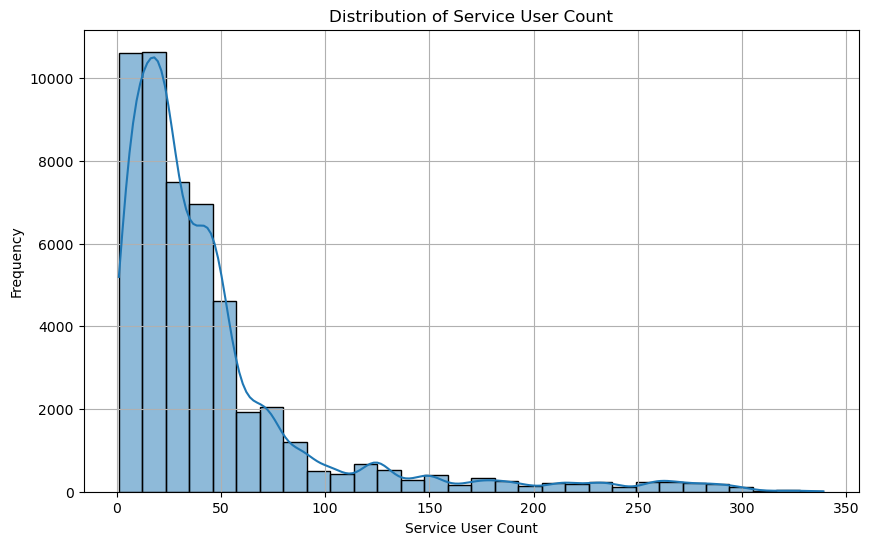

In [23]:
# Distribution of SERVICE_USER_COUNT
plt.figure(figsize=(10, 6))
sns.histplot(df['SERVICE_USER_COUNT'], bins=30, kde=True)
plt.title('Distribution of Service User Count')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

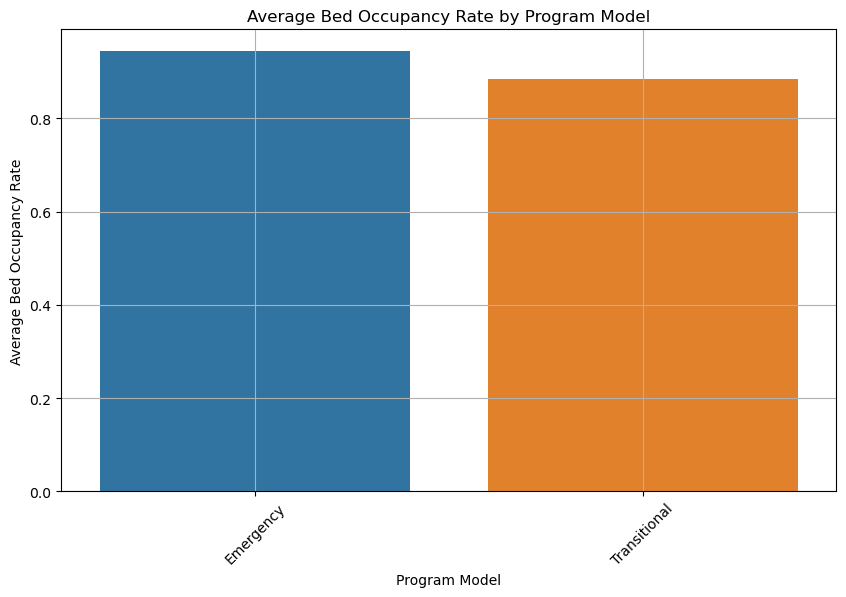

In [24]:
# Average Occupancy Rate by PROGRAM_MODEL
df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
avg_occupancy_by_program = df.groupby('PROGRAM_MODEL')['BED_OCCUPANCY_RATE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PROGRAM_MODEL', y='BED_OCCUPANCY_RATE', data=avg_occupancy_by_program)
plt.title('Average Bed Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Average Bed Occupancy Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

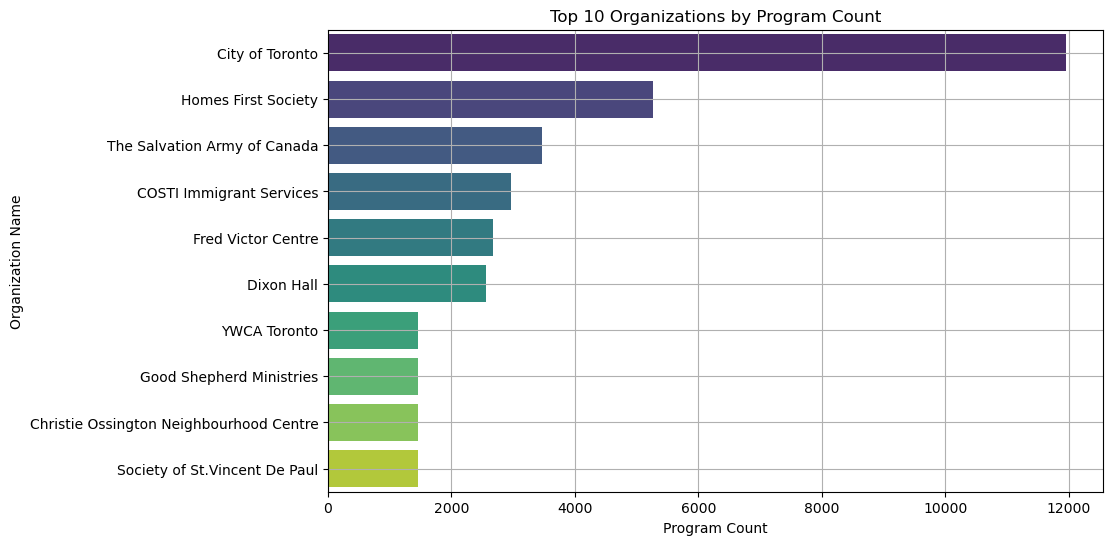

In [25]:
# the number of programs by ORGANIZATION_NAME to understand the distribution of programs across organizations.
programs_per_organization = df['ORGANIZATION_NAME'].value_counts().reset_index()
programs_per_organization.columns = ['ORGANIZATION_NAME', 'PROGRAM_COUNT']

plt.figure(figsize=(10, 6))
sns.barplot(x='PROGRAM_COUNT', y='ORGANIZATION_NAME', data=programs_per_organization.head(10), palette='viridis')
plt.title('Top 10 Organizations by Program Count')
plt.xlabel('Program Count')
plt.ylabel('Organization Name')
plt.grid(True)
plt.show()

In [27]:
avg_occupancy_by_program.head()

,PROGRAM_MODEL,BED_OCCUPANCY_RATE
0,Emergency,0.943501
1,Transitional,0.885194


In [28]:
programs_per_organization.head()

,ORGANIZATION_NAME,PROGRAM_COUNT
0,City of Toronto,11960
1,Homes First Society,5266
2,The Salvation Army of Canada,3461
3,COSTI Immigrant Services,2967
4,Fred Victor Centre,2673
